# 어떤 연예인이 나와 가장 닮았나?!
- 이미지에서 얼굴 영역을 추출한 후 임베딩을 해서 얼굴 임베딩 벡터 간 거리를 비교해 한 얼굴 이미지와 가장 유사한 얼굴을 찾아보자!

# step1) 필요 라이브러리 임포트

In [137]:
import os
import face_recognition
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython.display import Image
from PIL import Image
plt.rcParams['font.family']='NanumGothic'

# step2) 얼굴 이미지 모으기
## 2-1) 이미지 데이터셋 다운 받기
- 이미지 데이터셋 파일 경로

    📂face_embedding
        　┗📂images
             ┗📁celebrity  
                 ┗images...

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SCNlkW3l9bzsGhzFVk8DmNdfq9D-sey2' -O celebrity.tar.xz
!tar Jxvf celebrity.tar.xz

--2021-08-02 03:07:44--  https://docs.google.com/uc?export=download&id=1SCNlkW3l9bzsGhzFVk8DmNdfq9D-sey2
Resolving docs.google.com (docs.google.com)... 142.250.115.102, 142.250.115.101, 142.250.115.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.115.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ptgup33n3d33b599dr8922ngl25co9n7/1627873650000/10955108029758794712/*/1SCNlkW3l9bzsGhzFVk8DmNdfq9D-sey2?e=download [following]
--2021-08-02 03:07:48--  https://doc-0g-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ptgup33n3d33b599dr8922ngl25co9n7/1627873650000/10955108029758794712/*/1SCNlkW3l9bzsGhzFVk8DmNdfq9D-sey2?e=download
Resolving doc-0g-88-docs.googleusercontent.com (doc-0g-88-docs.googleusercontent.com)... 142.250.114.132, 2607:f8b0:4000:807::2001
Connecting to doc-0g-88-docs.googleusercontent.com (doc-

## 2-2) 비교할 얼굴 추가
- 같은 얼굴을 비슷하게 보는지 파악하기 위해서 동일 인물 이미지 가져오기

![김고은](face_embedding/images/celebrity/김고은.jpeg)

![김고은2](face_embedding/images/celebrity/김고은2.jpg)

- 이후 임베딩 거리 0.5 이내의 유사한 얼굴을 찾을 때도 `김고은`씨의 사진을 사용하겠다!

In [12]:
dir_path = os.getenv('HOME')+'/aiffel/enode5/face_embedding/images/celebrity/'

# step3) 얼굴 임베딩 벡터 생성
- 얼굴의 유사성을 비교하기 위해서 이미지에서 얼굴 영역을 검출한 후 얼굴 영역 임베딩 벡터를 추출하자.

## 3-1) 얼굴 영역 검출 `get_cropped_face(img)`

In [4]:
def get_cropped_face(image_file):
    img = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(img)
    
    a,b,c,d = face_locations[0]
    cropped_face=img[a:c,d:b,:]
    
    return cropped_face

- 추가 시각화를 위해 얼굴 영역 이미지 저장

In [28]:
def save_cropped_face(dir_path):
    files = os.listdir(dir_path)
    for file in files:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        img = Image.fromarray(face)
        cropped_path = os.path.join(dir_path,'cropped/','cropped_'+file)
        img.save(cropped_path)

In [ ]:
save_cropped_face(dir_path)

In [ ]:
!ls face_embedding/images/celevrity/cropped

## 3-2) 얼굴 영역 임베딩 벡터 추출 `get_face_embedding(face)`

In [73]:
import logging
import traceback
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try:
            name = file.split('.')[0]
            path = os.path.join(dir_path,file)
            face = get_cropped_face(path)
            embedding = get_face_embedding(face)
        except Exception as e:
            if os.path.isfile(file):
                os.remove(file)
            logging.basicConfig(filename='./img.log', filemode='w', format='%(messages)', level=logging.ERROR)
            logging.error(name)
        else:
            if len(embedding)>0:
                embedding_dict[name]=embedding[0]
            continue

    return embedding_dict

In [74]:
embedding_dict = get_face_embedding_dict(dir_path)

## 3-3) 예외처리
- 문제가 있는 것으로 발견된 `김대명`, `도아`, `드웨인 존슨`, `마동석`, `사무엘 L 잭슨`, `신비`, `신태용`, `유아`, `이승환`, `이용진`, `한효주`, `bush`, `비니`, `이명박`, `biden`, `산들`, `목진화`, `이말년` 이 잘 빠져있나 보자

In [75]:
embedding_dict.keys()

dict_keys(['리암 니슨', '이승기', '씨잼', '문재인', '이연걸', '김C', '딕헌터', '길', '하정우', '박나래', '차명석', '잇섭', '박용택', '서장훈', '대도서관', '이승철', '노홍철', '디오', '잭 블랙', '지수', '유노윤호', '배성재', '택연', '성룡', '이효리', 'biden', '이동휘', '문별', '장동건', '봉준호', '시우민', '박건우', '다니엘 크레이그', '김유정', '무라니시', '철면수심', '리아', '송중기', '정수빈', '영알남', '잇지예지', '벤 에플렉', '정준하', '켄 정', '안재홍', '윤경신', '이정재', '클린트 이스트우드', '슈가', '티모시 달튼', '브래들리 쿠퍼', '피어스 브로스넌', '윤도현', '아린', '지드래곤', '김영삼', '지민(BTS)', '돈스파이크', '개리', '김종서', '이용진', '유희열', '류승범', '김학범', '백현', 'bush', '박완규', '이천수', '이진호', '정우성', '이말년', '슬리피', '세훈', '박진영', '로다주', '최현석', '옥냥이', '리사', '솔라', '트와이스다현', '노무현', '이명박', '이광수', '태연', '김광현', '줄리엔강', '슈퍼비', '진', '화사', '손예진', '슬기', '장성호', '박성호', '수호', '박항서', '김희철', '민니', '케빈 스페이시', '김대중', '크리스 햄스워스', '아놀드 슈워제네거', '김고은', '방시혁', '이희준', '이경규', '온앤오프와이엇', '제이콥 배털론', '온앤오프효진', '이근대위', '트와이스모모', '정민철', '윤균상', '제니', '사쿠라', '전소미', '트와이스미나', '목진화', '온앤오프라운', '유리', '신동엽', '조승우', '이종석', '차승원', '배성우', '장원준', '레드벨벳웬디', '조인성', '황병국', '최무성', '지호', '서현진', '차범근', '박해일', 

- 걸러지지 않은 사진들

In [76]:
villan = ['김대명', '도아', '드웨인 존슨', '마동석', '사무엘 L 잭슨', '신비', '신태용', '유아', '이승환', '이용진', '한효주', 'bush', '비니', '이명박', 'biden', '산들', '목진화', '이말년']
for vi in villan:
    if vi in embedding_dict.keys():
        print(vi, end=' ')

드웨인 존슨 마동석 유아 이용진 bush 비니 이명박 biden 목진화 이말년 

# step4) 얼굴 임베딩 벡터 간 거리 계산

## 4-1) 얼굴 임베딩 벡터 간 거리 산출 `get_distance(name1, name2)`
- L2 Distance를 사용해 두 개의 임베딩 벡터 간 거리를 산출한다

In [77]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

## 4-2) 얼굴 임베딩 벡터 중 거리가 가장 작은 n개 구하기 `get_nearest(name, n)`
- 이름을 입력받아 데이터셋에 있는 다른 이름들의 임베딩 벡터와의 L2 거리 차이가 가장 작은 n명의 사람을 출력한다 

In [88]:
def get_nearest_face(name, top=5):
    file_list = os.listdir(dir_path)
    result_dict={}
    
    for file in file_list:
        try:
            other_name = file.split('.')[0]
            result_dict[other_name]=get_distance(name,other_name)
    
        except Exception as e:
            logging.basicConfig(filename='./sort.log', filemode='w', format='%(messages)', level=logging.ERROR)
            logging.error(name)
        else:
            continue
    idx = 1
    for n, d in sorted(result_dict.items(),key=lambda i : i[1]):
        if n == name: continue
        if idx > top: break # top으로 정해진 이미지 순위까지만 출력
        print(f'{idx}위 {n}, {d}')
        idx+=1

# step5) 시각화 시도
## 5-1) 유사도를 잘 분류하고 있는가?

In [89]:
get_nearest_face('김고은')

1위 김고은2, 0.3185788585826687
2위 아이린, 0.33170194756624155
3위 지호, 0.34059068301933837
4위 레드벨벳웬디, 0.34794947186061886
5위 지수, 0.34831128012443924


- 같은 인물의 다른 사진을 가장 닮은 인물로 보여주고 있는 것으로 보아 얼추 괜찮은 성능을 보여주는 것 같다!
- 그런데 동일 인물인 것 치고는 거리 폭이 큰 편이다.
- 데이터셋에 인물별 사진이같은 인물의 사진 여러개 있지 않아서 거리 조정이 더 가까이 되지 않은 것으로 보인다.

In [91]:
get_nearest_face('김고은',30)

1위 김고은2, 0.3185788585826687
2위 아이린, 0.33170194756624155
3위 지호, 0.34059068301933837
4위 레드벨벳웬디, 0.34794947186061886
5위 지수, 0.34831128012443924
6위 장원영, 0.34872259988615734
7위 승희, 0.3617296370268053
8위 조이, 0.3628229788143488
9위 트와이스사나, 0.36407978505465605
10위 잇지예지, 0.3655056687009104
11위 사쿠라, 0.36786095736975205
12위 비니, 0.370488391564667
13위 리아, 0.3795854012359405
14위 아이유, 0.3825580206195517
15위 류진, 0.38408310244854454
16위 우기, 0.38442940492610006
17위 박보영, 0.3890904420825941
18위 서현진, 0.3925957602763091
19위 아이즈원민주, 0.3930316600766484
20위 찬열, 0.3952163760464122
21위 태연, 0.3964685414626009
22위 강민경, 0.4033345230077901
23위 온앤오프라운, 0.4038713854211346
24위 트와이스미나, 0.4048737321977114
25위 강미나, 0.4091163521287361
26위 디오, 0.4099153271687982
27위 채연, 0.41163899307790497
28위 레인보우재경, 0.4129873480912683
29위 아이즈원조유리, 0.4143328510555348
30위 티파니, 0.41587635897344216


## 5-2) 어떤 얼굴들을 비슷하다고 분류할까?
- 그렇다면 어떤 얼굴들을 비슷하게 분석할까?

## 예상되는 기준들
- 크게 성별, 인종, 연령대 정도가 유사도를 판단하는데 큰 영향을 줄 것이다.

- 성별 : 여성, 남성
- 인종 : 한국인, 그 외 외국인
- 연령대 : 20\~30대, 40\~60대

### 성별별
- 비교적 정확한 편이지만 선이 중성적인 인물은 성별이 섞여 나오는 경우도 있었다.

In [93]:
get_nearest_face('류진')

1위 아이즈원민주, 0.33962094588500225
2위 지호, 0.3579954124897849
3위 박보영, 0.35818621172330356
4위 아이유, 0.3659555286890938
5위 리아, 0.3689707464597569


In [103]:
get_nearest_face('송중기')

1위 RM, 0.42813573273516553
2위 조정석, 0.4373158746656733
3위 온앤오프와이엇, 0.4525070154793653
4위 이진호, 0.4585752703842062
5위 이준혁, 0.4735894246759471


In [104]:
get_nearest_face('디오')

1위 권현빈, 0.3797563165337307
2위 수호, 0.3875697606518527
3위 박보영, 0.3904179879638691
4위 씨잼, 0.3966414499879643
5위 지수, 0.40448199900858145


### 인종별

In [107]:
get_nearest_face('박서준')

1위 김희철, 0.40367557506082347
2위 조정석, 0.40517336186836067
3위 디오, 0.41574587313075845
4위 김유정, 0.4189334909821768
5위 권현빈, 0.42588859609659707


In [97]:
get_nearest_face('크리스 에반스')

1위 bush, 0.6737346329468296
2위 클린트 이스트우드, 0.6894094557285569
3위 biden, 0.6953993256680224
4위 크리스 햄스워스, 0.7027362321196639
5위 마크 러팔로, 0.7097207305514132


In [102]:
get_nearest_face('잭 블랙')

1위 레오나르도 디카프리오, 0.6628608575405815
2위 잭 니콜슨, 0.6746962250853047
3위 김윤석, 0.750533815846198
4위 홍구, 0.7511836742145522
5위 벤 에플렉, 0.7584913541191752


- 데이터셋이 많지 않은 인종은 그다지 정확하지 않았다.

In [92]:
get_nearest_face('obama')

1위 권태원, 0.662437167088693
2위 김C, 0.6974470985249644
3위 성룡, 0.7058109601818953
4위 김연우, 0.7156419959573639
5위 이정재, 0.7166228174220921


### 연령별
- 청년층과 중년층에서는 확연히 비슷한 연령대 집단을 보여주고 있으나 장년층 같은 경우 데이터가 많지 않아서 비교적 다른 연령대의 인물도 유사한 인물로 보여주고 있다.

In [155]:
# 청년층
get_nearest_face('지호')

1위 트와이스사나, 0.2684695256500804
2위 리아, 0.29407418543109115
3위 윤아, 0.3191656007977451
4위 태연, 0.3205311955588925
5위 아이유, 0.3279119072240571


In [95]:
# 중년층
get_nearest_face('김연우')

1위 이재용, 0.45726406711147344
2위 최양락, 0.4600999180814042
3위 박휘순, 0.46475429040310196
4위 박성호, 0.46637724583133183
5위 윤종신, 0.47653595074907257


In [156]:
# 장년층
get_nearest_face('권태원')

1위 이경규, 0.3725713620620323
2위 이정재, 0.43574844840728266
3위 주진모(올드), 0.4360286744111003
4위 손흥민, 0.44047222690112947
5위 유해진, 0.45231663038217335


## 5-3) 두 이미지간 유사도 수치화
- `matplotlib`으로 이미지를 보여주면서 수치화 해보자.

## 5-4) 번외편 가장 많은 사람의 5위 안에 든 사람
- 만인의 닮은 꼴은 누구일까?
- 모든 데이터 셋의 가장 유사한 사람 5위 목록을 반환 받아 가장 많은 사람들의 유사한 사람 5위에 진입한 사람을 뽑아보자!

- `get_nearest_face_list(name, n)` : 어떤 인물의 가장 유사한 n명의 이름과 L2 거리 값 리스트를 반환
- `get_everybody_similar_face(n)` : 전체 데이터 셋 중에서 유사한 top 5인에 가장 많이 언급된 n명 사진 출력

In [151]:
def get_nearest_face_list(name, top=5):
    file_list = os.listdir(dir_path)
    result_dict={}
    
    for file in file_list:
        try:
            other_name = file.split('.')[0]
            result_dict[other_name]=get_distance(name,other_name)
    
        except Exception as e:
            logging.basicConfig(filename='./sort.log', filemode='w', format='%(messages)', level=logging.ERROR)
            logging.error(name)
        else:
            continue
    return sorted(result_dict.items(),key=lambda i : i[1])[1:top+1] # 상위 다섯개만 반환

def get_everybody_similar_face(top=5):
    file_list = os.listdir(dir_path)
    result_dict = {}
    
    for file in file_list:
        name = file.split('.')[0]
        names_dict = get_nearest_face_list(name)
        for n, _ in names_dict:
            result_dict.setdefault(n, 0)
            result_dict[n] += 1
        
    idx = 1
    top_dict = sorted(result_dict.items(),key=lambda i : i[1], reverse=True)[:top+1]
    plt.figure(figsize=(12,20))
    for n, score in top_dict:
        ax = plt.subplot(top//3+1,3,idx)
        plt.title(f'{idx}위 {n}, {score}')
        for file in file_list:
            if n in file:
                img = plt.imread(dir_path+file)
                plt.imshow(img)
                break
        idx +=1
    plt.show()


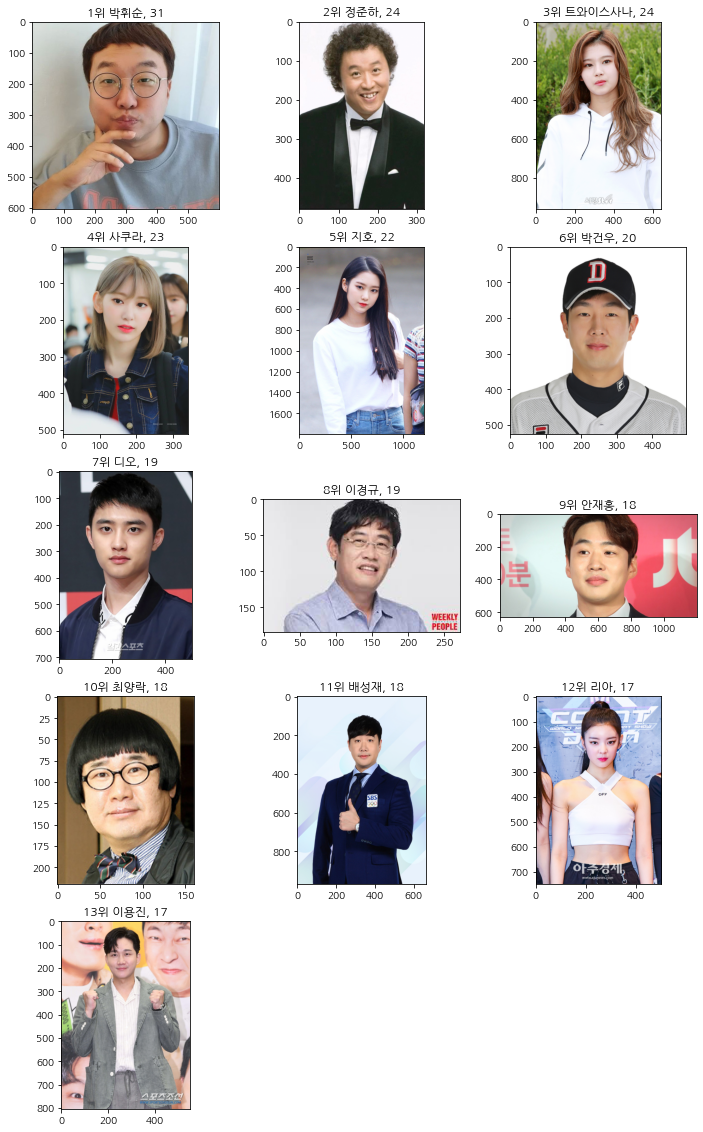

In [152]:
get_everybody_similar_face(12)

- 다루었던 데이터 셋에서는 `박휘순` 씨가 가장 만인의 닮은 꼴이었다!

# 회고

- 차원축소를 이용해 시각화 해보고 싶다.
    - 공부해볼 오픈소스 : `UMAP`, `tf.projector`
- 유클리드 유사도를 어떤 식으로 수치화 하면 이미지 간 유사한 정도를 쉽게 파악할 수 있을까? 
- 반환 타입을 잘 살펴서 코드를 짜자.